<a href="https://colab.research.google.com/github/jhoanlond/Curso_aprendizaje_estadistico/blob/main/info_estaciones_IDEAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from datetime import datetime, timedelta
from sodapy import Socrata
#client = Socrata("www.datos.gov.co", None)
client = Socrata("www.datos.gov.co", 
                "ymgH2QpK9Z5cSKBNlKgtuzWZP", 
                username="esteban.silvav@udea.edu.co", 
                password="Nomeacuerdodatosabiertos_1")

In [ ]:
# Función para cambiar formato de fechas
def func_datetime(x):
    try:
        return datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f')
    except:
        return pd.NaT

# Hacer correcciones de formato
def corr_format(y):
    dk = y
    dk['fecha'] = dk['fechaobservacion'].apply(func_datetime)
    dk['fecha'] = pd.to_datetime(dk['fecha'])
    dk['codigoestacion'] = dk['codigoestacion'].astype(float)
    dk['valorobservado'] = dk['valorobservado'].astype(float)
    dk['latitud'] = dk['latitud'].astype(float)
    dk['longitud'] = dk['longitud'].astype(float)
    dk = dk[['fecha','nombreestacion','latitud','longitud','valorobservado','descripcionsensor','unidadmedida','codigoestacion']]
    #dk = dk[dk['codigoestacion']==15075501]
    return dk

In [ ]:
source = "https://www.datos.gov.co/resource/hp9r-jxuu.json?$limit=30000"
info_ideam = pd.read_json(source)
#results = client.get("hp9r-jxuu", limit=30000)
#info_ideam = pd.DataFrame.from_records(results)

In [ ]:
print(info_ideam.shape)
info_ideam.head()

(8973, 17)


,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,altitud,fecha_instalacion,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,fecha_suspension
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"{'latitude': '0.81378611', 'longitude': '-77.6...",2582,2016-11-15,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"{'latitude': '0.93030556', 'longitude': '-77.4...",2450,2005-12-10,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"{'latitude': '1.07061111', 'longitude': '-77.6...",3120,2004-03-01,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"{'latitude': '1.08288889', 'longitude': '-76.6...",760,2005-11-11,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"{'latitude': '-3.78030556', 'longitude': '-70....",158,2005-07-19,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN


In [ ]:
info_ideam.describe(include=object)

,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,fecha_instalacion,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,fecha_suspension
count,8973,8973,8973,8973,8973,8973,8973,8839,8973,8955,8973,8973,8973,8973,3441
unique,8945,12,3,3,33,1027,7897,1725,11,1151,5,38,257,66,910
top,GARAGOA CESAM [35075110],Pluviométrica,Convencional,Activa,Antioquia,"Bogota, D.C","{'latitude': '6.25', 'longitude': '-75.56666667'}",2017-06-30 19:00,Area Operativa 09 - Cauca-Valle-Caldas,0,Magdalena Cauca,Cauca,Río Bogotá,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,2002-02-15
freq,3,3533,7476,5491,1215,342,8,75,1714,878,6386,1805,806,4442,93


In [ ]:
info_ideam.dtypes

codigo                   int64
nombre                  object
categoria               object
tecnologia              object
estado                  object
departamento            object
municipio               object
ubicaci_n               object
altitud                  int64
fecha_instalacion       object
area_operativa          object
corriente               object
area_hidrografica       object
zona_hidrografica       object
subzona_hidrografica    object
entidad                 object
fecha_suspension        object
dtype: object

In [ ]:
info_ideam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   codigo                8973 non-null   int64 
 1   nombre                8973 non-null   object
 2   categoria             8973 non-null   object
 3   tecnologia            8973 non-null   object
 4   estado                8973 non-null   object
 5   departamento          8973 non-null   object
 6   municipio             8973 non-null   object
 7   ubicaci_n             8973 non-null   object
 8   altitud               8973 non-null   int64 
 9   fecha_instalacion     8839 non-null   object
 10  area_operativa        8973 non-null   object
 11  corriente             8955 non-null   object
 12  area_hidrografica     8973 non-null   object
 13  zona_hidrografica     8973 non-null   object
 14  subzona_hidrografica  8973 non-null   object
 15  entidad               8973 non-null   

In [ ]:
info_ideam.index

RangeIndex(start=0, stop=8973, step=1)

In [ ]:
info_ideam.columns

Index(['codigo', 'nombre', 'categoria', 'tecnologia', 'estado', 'departamento',
       'municipio', 'ubicaci_n', 'altitud', 'fecha_instalacion',
       'area_operativa', 'corriente', 'area_hidrografica', 'zona_hidrografica',
       'subzona_hidrografica', 'entidad', 'fecha_suspension'],
      dtype='object')

In [ ]:
info_ideam['departamento'].unique()

array(['Nariño', 'Putumayo', 'Amazonas', 'Caquetá', 'Huila', 'Cauca',
       'Bolívar', 'Sucre', 'Boyacá', 'Valle del Cauca', 'Caldas',
       'Tolima', 'Cundinamarca', 'Meta', 'Bogotá', 'Guainía', 'RIsaralda',
       'Quindío', 'Casanare', 'Chocó', 'Antioquia', 'Santander',
       'Norte de Santander', 'Arauca', 'Córdoba', 'Cesar', 'Magdalena',
       'La Guajira',
       'Archipiélago de San Andres, Providencia y Santa Catalina',
       'Atlantico', 'Vaupes', 'Vichada', 'Guaviare'], dtype=object)

In [ ]:
info_ideam['tecnologia'].unique()

array(['Automática con Telemetría', 'Convencional',
       'Automática sin Telemetría'], dtype=object)

# Problemas a resolver:
1. Tipo de los datos
2. Revisar NaN (última fila). Posible correlación con funcionalidad de la estación
3. Distribuciones

In [ ]:
info_ideam['fecha_instalacion'] = pd.to_datetime(info_ideam['fecha_instalacion'],format="%Y-%m-%d")
info_ideam['fecha_suspension'] = pd.to_datetime(info_ideam['fecha_suspension'],format="%Y-%m-%d")

In [ ]:
info_ideam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   codigo                8973 non-null   int64         
 1   nombre                8973 non-null   object        
 2   categoria             8973 non-null   object        
 3   tecnologia            8973 non-null   object        
 4   estado                8973 non-null   object        
 5   departamento          8973 non-null   object        
 6   municipio             8973 non-null   object        
 7   ubicaci_n             8973 non-null   object        
 8   altitud               8973 non-null   int64         
 9   fecha_instalacion     8839 non-null   datetime64[ns]
 10  area_operativa        8973 non-null   object        
 11  corriente             8955 non-null   object        
 12  area_hidrografica     8973 non-null   object        
 13  zona_hidrografica 

In [ ]:
info_ideam.isna().sum()*100/info_ideam.shape[0]

codigo                   0.000000
nombre                   0.000000
categoria                0.000000
tecnologia               0.000000
estado                   0.000000
departamento             0.000000
municipio                0.000000
ubicaci_n                0.000000
altitud                  0.000000
fecha_instalacion        1.493369
area_operativa           0.000000
corriente                0.200602
area_hidrografica        0.000000
zona_hidrografica        0.000000
subzona_hidrografica     0.000000
entidad                  0.000000
fecha_suspension        61.651622
dtype: float64

In [ ]:
info_ideam.isnull().sum()

codigo                     0
nombre                     0
categoria                  0
tecnologia                 0
estado                     0
departamento               0
municipio                  0
ubicaci_n                  0
altitud                    0
fecha_instalacion        134
area_operativa             0
corriente                 18
area_hidrografica          0
zona_hidrografica          0
subzona_hidrografica       0
entidad                    0
fecha_suspension        5532
dtype: int64

In [ ]:
info_ideam['estado'].unique()

array(['Activa', 'Suspendida', 'En Mantenimiento'], dtype=object)

In [ ]:
print(len(info_ideam[info_ideam['estado'] == 'Suspendida']),
      len(info_ideam[info_ideam['estado'] == 'En Mantenimiento']),
     len(info_ideam[info_ideam['estado'] == 'Suspendida']) + len(info_ideam[info_ideam['estado'] == 'En Mantenimiento']))

3439 43 3482


In [ ]:
info_ideam['latitude'] = [info_ideam['ubicaci_n'][x]['latitude'] for x in range(len(info_ideam['ubicaci_n']))]
info_ideam['latitude'] = pd.to_numeric(info_ideam['latitude'],errors='coerce')
info_ideam['longitude'] = [info_ideam['ubicaci_n'][x]['longitude'] for x in range(len(info_ideam['ubicaci_n']))]
info_ideam['longitude'] = pd.to_numeric(info_ideam['longitude'],errors='coerce')

In [ ]:
info_ideam.head()

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,altitud,fecha_instalacion,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,fecha_suspension,latitude,longitude
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"{'latitude': '0.81378611', 'longitude': '-77.6...",2582,2016-11-15,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,0.813786,-77.661978
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"{'latitude': '0.93030556', 'longitude': '-77.4...",2450,2005-12-10,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,0.930306,-77.491194
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"{'latitude': '1.07061111', 'longitude': '-77.6...",3120,2004-03-01,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,1.070611,-77.636889
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"{'latitude': '1.08288889', 'longitude': '-76.6...",760,2005-11-11,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,1.082889,-76.667111
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"{'latitude': '-3.78030556', 'longitude': '-70....",158,2005-07-19,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,-3.780306,-70.362639


In [ ]:
info_ideam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   codigo                8973 non-null   int64         
 1   nombre                8973 non-null   object        
 2   categoria             8973 non-null   object        
 3   tecnologia            8973 non-null   object        
 4   estado                8973 non-null   object        
 5   departamento          8973 non-null   object        
 6   municipio             8973 non-null   object        
 7   ubicaci_n             8973 non-null   object        
 8   altitud               8973 non-null   int64         
 9   fecha_instalacion     8839 non-null   datetime64[ns]
 10  area_operativa        8973 non-null   object        
 11  corriente             8955 non-null   object        
 12  area_hidrografica     8973 non-null   object        
 13  zona_hidrografica 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Para Bbox
#bound = {'lon': [-90,-60], 
#          'lat': [-15,15]}
#BBox = (-83.0,-66.0,15.0,-5.0)
BBox = ((info_ideam['longitude'].min(),   info_ideam['longitude'].max(),      
         info_ideam['latitude'].min(), info_ideam['latitude'].max()))
#BBox = (-90,-60,-15,15)
mapa_ideam = plt.imread("/content/drive/MyDrive/Drive - UdeA/Diploma/map2.png")

(-4.28333333, 15.7975)

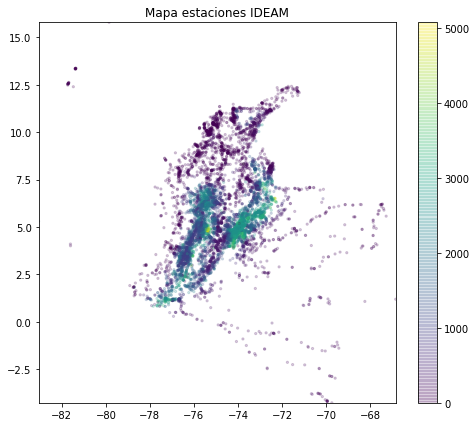

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
im = ax.scatter(info_ideam['longitude'], info_ideam['latitude'], zorder=1, alpha= 0.2, c=info_ideam['altitud'], s=5)
fig.colorbar(im, ax=ax)
ax.set_title('Mapa estaciones IDEAM')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(mapa_ideam, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
info_ideam.columns

Index(['codigo', 'nombre', 'categoria', 'tecnologia', 'estado', 'departamento',
       'municipio', 'ubicaci_n', 'altitud', 'fecha_instalacion',
       'area_operativa', 'corriente', 'area_hidrografica', 'zona_hidrografica',
       'subzona_hidrografica', 'entidad', 'fecha_suspension', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
info_ideam['departamento'].unique()

array(['Nariño', 'Putumayo', 'Amazonas', 'Caquetá', 'Huila', 'Cauca',
       'Bolívar', 'Sucre', 'Boyacá', 'Valle del Cauca', 'Caldas',
       'Tolima', 'Cundinamarca', 'Meta', 'Bogotá', 'Guainía', 'RIsaralda',
       'Quindío', 'Casanare', 'Chocó', 'Antioquia', 'Santander',
       'Norte de Santander', 'Arauca', 'Córdoba', 'Cesar', 'Magdalena',
       'La Guajira',
       'Archipiélago de San Andres, Providencia y Santa Catalina',
       'Atlantico', 'Vaupes', 'Vichada', 'Guaviare'], dtype=object)

In [ ]:
ok = (info_ideam['departamento'] == 'La Guajira') & \
     (info_ideam['categoria'] == 'Climática Principal') & \
     (info_ideam['tecnologia'] == 'Automática con Telemetría')
info_ideam[ok]

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,altitud,fecha_instalacion,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,fecha_suspension,latitude,longitude
214,15065190,MONGUI - AUT [15065190],Climática Principal,Automática con Telemetría,Activa,La Guajira,Riohacha,"{'latitude': '11.22677778', 'longitude': '-72....",60,2011-11-22 00:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,Barroblanco,Caribe,Caribe - Guajira,Río Ranchería,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,11.226778,-72.820639
219,15085050,TOROMANA - AUT [15085050],Climática Principal,Automática con Telemetría,Activa,La Guajira,Uribia,"{'latitude': '12.08352778', 'longitude': '-71....",144,2005-04-18 00:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,Manzanares,Caribe,Caribe - Guajira,"Río Carraipia - Paraguachon, Directos al Golfo...",INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,12.083528,-71.210944
331,15065040,LA PAULINA - AUT [15065040],Climática Principal,Automática con Telemetría,Activa,La Guajira,Fonseca,"{'latitude': '10.89813889', 'longitude': '-72....",170,1966-09-14 19:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,0,Caribe,Caribe - Guajira,Río Ranchería,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,10.898139,-72.828472
1838,15065501,LA MINA CERREJON - AUT [15065501],Climática Principal,Automática con Telemetría,Activa,La Guajira,Albania (La guajira),"{'latitude': '11.13758333', 'longitude': '-72....",80,2014-08-26 19:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,0,Caribe,Caribe - Guajira,Río Ranchería,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,11.137583,-72.615944
2796,15075501,AEROPUERTO PUERTO BOLIVAR - AUT [15075501],Climática Principal,Automática con Telemetría,Activa,La Guajira,Uribia,"{'latitude': '12.22430556', 'longitude': '-71....",10,2014-08-20 19:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,0,Caribe,Caribe - Guajira,Directos Caribe - Ay.Sharimahana Alta Guajira,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,12.224306,-71.982889
3608,15065200,Caracoli,Climática Principal,Automática con Telemetría,Suspendida,La Guajira,San Juan Del Cesar,"{'latitude': '10.75233333', 'longitude': '-73....",300,2016-12-22 19:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,0,Magdalena Cauca,Cesar,Alto Cesar,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,2019-10-22 11:06:00,10.752333,-73.003194
4197,2801500078,HATICO DE LOS INDIOS - AUT [2801500078],Climática Principal,Automática con Telemetría,Activa,La Guajira,San Juan Del Cesar,"{'latitude': '10.86030556', 'longitude': '-73....",489,2017-02-14 19:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,0,Magdalena Cauca,Cesar,Alto Cesar,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,10.860306,-73.114222
4246,1508500053,PUERTO ESTRELLA - AUT [1508500053],Climática Principal,Automática con Telemetría,Activa,La Guajira,Uribia,"{'latitude': '12.33919444', 'longitude': '-71....",0,2017-05-01 00:00:00,Area Operativa 05 - Magdalena-Cesar-Guajira,0,Caribe,Caribe - Guajira,"Río Carraipia - Paraguachon, Directos al Golfo...",INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaT,12.339194,-71.345081


# Construcción de base de datos con Socrata

In [ ]:
# Códigos de variables climáticas
# Velocidad del Viento: sgfv-3yp8
# Dirección del Viento: kiw7-v9ta
# Humedad del aire a 2 metros: uext-mhny
# Precipitación: s54a-sgyg
# Temperatura máxima: ccvq-rp9s
# Temperatúra mínima: afdg-3zpb
# Temperatura: sbwg-7ju4
# Presión Atmosférica: 62tk-nxj

#param = ['VeloViento','DireViento','Humedad','Precipitacion','MaxTemperatura','MinTemperatura', 'Temperatura','Presion']
#catal = ['sgfv-3yp8','kiw7-v9ta','uext-mhny','s54a-sgyg','ccvq-rp9s','afdg-3zpb', 'sbwg-7ju4','62tk-nxj5']

param = ['VeloViento','DireViento','Humedad','Precipitacion', 'Temperatura','Presion']
catal = ['sgfv-3yp8','kiw7-v9ta','uext-mhny','m84s-22dd', 'sbwg-7ju4','62tk-nxj5']

limite_datos = 500000
condicion_busqueda = "fechaobservacion>'2020-01-01T00:00:00.000' and fechaobservacion<'2022-04-01T00:00:00.000' and codigoestacion='0021205791'"


In [ ]:
#VeloViento
results = client.get("sgfv-3yp8", limit=limite_datos, where=condicion_busqueda)
df1 = pd.DataFrame.from_records(results)
df1 = corr_format(df1)
df1.columns = df1.columns.str.replace('valorobservado', 'VeloViento')

In [ ]:
#DireViento
results = client.get("kiw7-v9ta", limit=limite_datos, where=condicion_busqueda)
df2 = pd.DataFrame.from_records(results)
df2 = corr_format(df2)
df2.columns = df2.columns.str.replace('valorobservado', 'DireViento')

In [ ]:
#Humedad
results = client.get("uext-mhny", limit=limite_datos, where=condicion_busqueda)
df3 = pd.DataFrame.from_records(results)
df3 = corr_format(df3)
df3.columns = df3.columns.str.replace('valorobservado', 'Humedad')

In [ ]:
#Precipitacion
results = client.get("m84s-22dd", limit=limite_datos, where=condicion_busqueda)
df4 = pd.DataFrame.from_records(results)
df4 = corr_format(df4)
df4.columns = df4.columns.str.replace('valorobservado', 'Precipitacion')

In [ ]:
#Presion
results = client.get("62tk-nxj5", limit=limite_datos, where=condicion_busqueda)
df7 = pd.DataFrame.from_records(results)
df7 = corr_format(df7)
df7.columns = df7.columns.str.replace('valorobservado', 'Presion')

In [ ]:
#Temperatura
results = client.get("sbwg-7ju4", limit=limite_datos, where=condicion_busqueda)
df8 = pd.DataFrame.from_records(results)
df8 = corr_format(df8)
df8.columns = df8.columns.str.replace('valorobservado', 'Temperatura')

In [ ]:
'''
#MaxTemperatura
results = client.get("ccvq-rp9s", limit=limite_datos, where=condicion_busqueda)
df5 = pd.DataFrame.from_records(results)
df5 = corr_format(df5)
df5.columns = df5.columns.str.replace('valorobservado', 'MaxTemperatura')

#MinTemperatura
results = client.get("afdg-3zpb", limit=limite_datos, where=condicion_busqueda)
df6 = pd.DataFrame.from_records(results)
df6 = corr_format(df6)
df6.columns = df6.columns.str.replace('valorobservado', 'MinTemperatura')
'''

In [ ]:
#Información básica de los dfs
print('Parámetro:',param[0], ' - Tamaño DF1: ',df1.shape[0], ' - FechaMin: ',df1['fecha'].min(), ' - FechaMax: ',df1['fecha'].max())
print('Parámetro:',param[1], ' - Tamaño DF2: ',df2.shape[0], ' - FechaMin: ',df2['fecha'].min(), ' - FechaMax: ',df2['fecha'].max())
print('Parámetro:',param[2], ' - Tamaño DF3: ',df3.shape[0], ' - FechaMin: ',df3['fecha'].min(), ' - FechaMax: ',df3['fecha'].max())
print('Parámetro:',param[3], ' - Tamaño DF4: ',df4.shape[0], ' - FechaMin: ',df4['fecha'].min(), ' - FechaMax: ',df4['fecha'].max())
#print('Parámetro:',param[4], ' - Tamaño DF5: ',df5.shape[0], ' - FechaMin: ',df5['fecha'].min(), ' - FechaMax: ',df5['fecha'].max())
#print('Parámetro:',param[5], ' - Tamaño DF6: ',df6.shape[0], ' - FechaMin: ',df6['fecha'].min(), ' - FechaMax: ',df6['fecha'].max())
print('Parámetro:',param[4], ' - Tamaño DF7: ',df7.shape[0], ' - FechaMin: ',df7['fecha'].min(), ' - FechaMax: ',df7['fecha'].max())
print('Parámetro:',param[5], ' - Tamaño DF8: ',df8.shape[0], ' - FechaMin: ',df8['fecha'].min(), ' - FechaMax: ',df8['fecha'].max())

Parámetro: VeloViento  - Tamaño DF1:  96882  - FechaMin:  2020-01-01 04:10:00  - FechaMax:  2022-03-31 23:50:00
Parámetro: DireViento  - Tamaño DF2:  95032  - FechaMin:  2020-01-01 04:10:00  - FechaMax:  2022-03-31 23:50:00
Parámetro: Humedad  - Tamaño DF3:  16861  - FechaMin:  2020-01-01 05:00:00  - FechaMax:  2022-03-31 23:00:00
Parámetro: Precipitacion  - Tamaño DF4:  97772  - FechaMin:  2020-01-01 04:10:00  - FechaMax:  2022-03-31 23:50:00
Parámetro: Temperatura  - Tamaño DF7:  16360  - FechaMin:  2020-01-01 05:00:00  - FechaMax:  2022-03-31 23:00:00
Parámetro: Presion  - Tamaño DF8:  17013  - FechaMin:  2020-01-01 05:00:00  - FechaMax:  2022-03-31 23:00:00


In [ ]:
tmp0 = pd.merge(df8, df7, on=['fecha', 'nombreestacion','latitud','longitud'],how="inner") # Temperatura y Presión
tmp0 = tmp0[['fecha','nombreestacion','latitud',	'longitud',	'Temperatura', 'Presion']]
print(tmp0.shape[0])
tmp1 = pd.merge(tmp0, df3, on=['fecha', 'nombreestacion','latitud','longitud'],how="inner") # Temperatura, Presión y Humedad
tmp1 = tmp1[['fecha','nombreestacion','latitud',	'longitud',	'Temperatura', 'Presion', 'Humedad']]
print(tmp1.shape[0])
df_f = pd.merge(tmp1, df4, on=['fecha', 'nombreestacion','latitud','longitud'],how="inner") # Temperatura, Presión, Humedad y Precipitación
df_f = df_f[['fecha','nombreestacion','latitud',	'longitud',	'Temperatura', 'Presion', 'Humedad', 'Precipitacion']]
print(df_f.shape[0])
df_f.set_index('fecha', inplace=True)
df_f.sort_index(inplace=True)

16238
16169
16068


In [ ]:
df_f.head()

,nombreestacion,latitud,longitud,Temperatura,Presion,Humedad,Precipitacion
fecha,,,,,,,
2020-01-01 05:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,8.5,752.1,100.0,0.0
2020-01-01 06:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,8.2,752.6,100.0,0.0
2020-01-01 08:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,11.0,753.4,100.0,0.0
2020-01-01 09:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,13.5,753.8,100.0,0.0
2020-01-01 10:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,17.1,753.5,76.0,0.0


In [ ]:
import plotly.graph_objs as go

temperatura_plt = go.Scattergl(x=df_f.index, y=df_f['Temperatura'], mode = 'markers', name='Observado')
df_plt = [temperatura_plt]
layout = go.Layout(xaxis_title="Date", yaxis_title='Temperatura')
fig = go.Figure(data=df_plt, layout=layout)
fig

In [ ]:
humedad_plt = go.Scattergl(x=df_f.index, y=df_f['Humedad'], mode = 'markers', name='Observado')
df_plt = [humedad_plt]
layout = go.Layout(xaxis_title="Date", yaxis_title='Humedad')
fig = go.Figure(data=df_plt, layout=layout)
fig

In [ ]:
presion_plt = go.Scattergl(x=df_f.index, y=df_f['Presion'], mode = 'markers', name='Observado')
df_plt = [presion_plt]
layout = go.Layout(xaxis_title="Date", yaxis_title='Presion')
fig = go.Figure(data=df_plt, layout=layout)
fig

In [ ]:
precipitacion_plt = go.Scattergl(x=df_f.index, y=df_f['Precipitacion'], mode = 'markers', name='Observado')
df_plt = [precipitacion_plt]
layout = go.Layout(xaxis_title="Date", yaxis_title='Precipitacion')
fig = go.Figure(data=df_plt, layout=layout)
fig

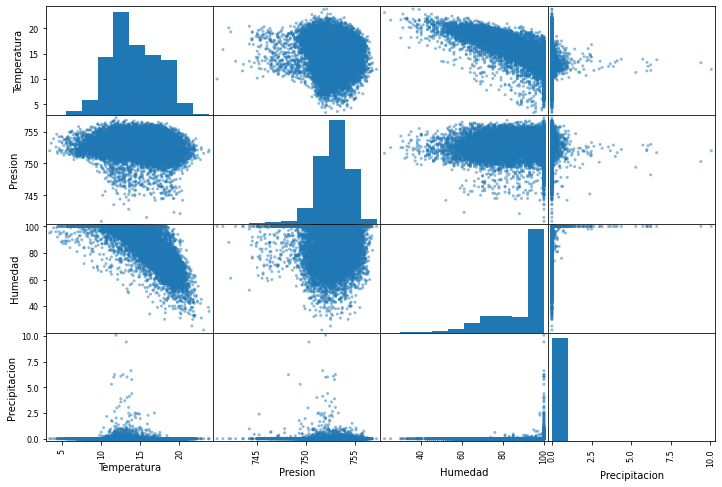

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_f[['Temperatura', 'Presion', 'Humedad', 'Precipitacion']], figsize=(12, 8))
plt.show()

In [ ]:
# Extraer nuevas columnas de años, mes, día, hora


# Seleccionamos los datos de precipitación dependiendo de su valor

In [ ]:
df_f2 = df_f[df_f['Precipitacion']>0]
df_f2.sort_index(inplace=True)

In [ ]:
# Categorizar Precipitación como binario
bins_lluvia = np.linspace(min(df_f2['Precipitacion']), max(df_f2['Precipitacion']), 4)
print(bins_lluvia)
group_names = ['no_lluvia', 'poca_lluvia', 'lluvia']
df_f2['categoria_lluvia'] = pd.cut(df_f2['Precipitacion'], bins_lluvia, labels=group_names, include_lowest=True )

[1.000e-02 3.360e+00 6.710e+00 1.006e+01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_f2['categoria_lluvia'].value_counts()

no_lluvia      1200
poca_lluvia      14
lluvia            2
Name: categoria_lluvia, dtype: int64

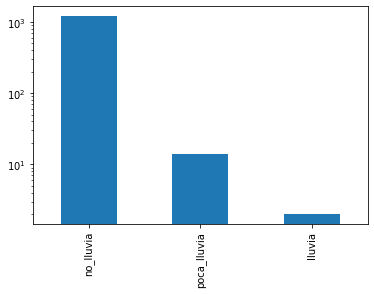

In [ ]:
df_f2['categoria_lluvia'].value_counts().plot(kind='bar')
plt.yscale('log')

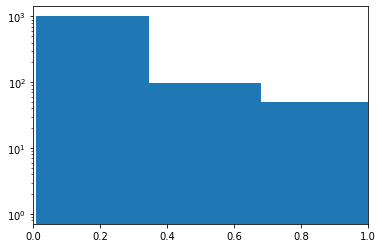

In [ ]:
plt.hist(df_f2["Precipitacion"], bins = 30)
plt.xlim(0,1)
plt.yscale('log')

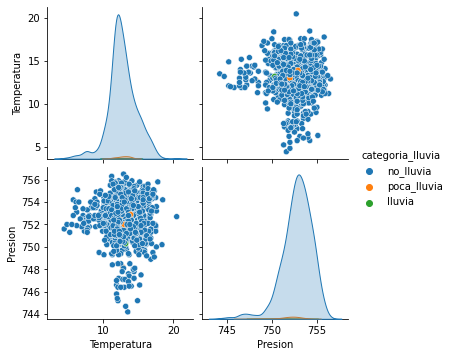

In [ ]:
import seaborn as sns
sns.pairplot(df_f2, hue = "categoria_lluvia", vars = ['Temperatura', 'Presion'])

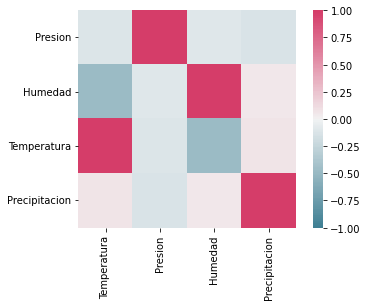

In [ ]:
df_new = df_f2[['Temperatura', 'Presion', 'Humedad', 'Precipitacion','categoria_lluvia']]
corr_new = df_new.corr().sort_values(by='Precipitacion')

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 0, n=200),
    square=True
)

## Ejercicio con LogisticRegressio y SVC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
tra = int(df_f2.shape[0]*80/100)
tes = int(df_f2.shape[0]*20/100)
val = tes

In [ ]:
train_x = df_f2[['Temperatura', 'Presion', 'Humedad',"Precipitacion"]][:tra]
train_y = df_f2['categoria_lluvia'][:tra]

test_x = df_f2[['Temperatura', 'Presion', 'Humedad',"Precipitacion"]][tra:]
test_y = df_f2['categoria_lluvia'][tra:]

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(972, 4) (972,) (244, 4) (244,)


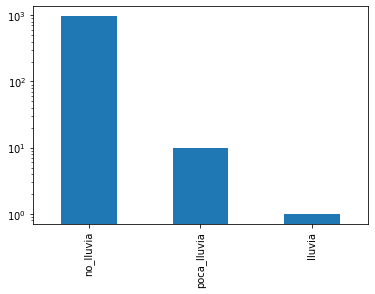

In [ ]:
train_y.value_counts().plot(kind='bar')
plt.yscale('log')

In [ ]:
clasf = LogisticRegression(solver='lbfgs',C=0.01)
svm   = SVC(gamma="auto",probability=True)

In [ ]:
clasf.fit(train_x,train_y)
svm.fit(train_x,train_y);

In [ ]:
y_pred_logreg = clasf.predict(test_x)
y_pred_svm = svm.predict(test_x)

In [ ]:
print('Scores for LogReg')
print(clasf.score(train_x,train_y),clasf.score(test_x,test_y))
print()
print('Scores for SVC')
print(svm.score(train_x,train_y),svm.score(test_x,test_y))

Scores for LogReg
0.9886831275720165 0.9795081967213115

Scores for SVC
1.0 0.9918032786885246


In [ ]:
confusion_lg = confusion_matrix(test_y, y_pred_logreg)
print("Confusion matrix LogReg:\n{}".format(confusion_lg))
print()
confusion_svm = confusion_matrix(test_y, y_pred_svm)
print("Confusion matrix SVM:\n{}".format(confusion_svm))

Confusion matrix LogReg:
[[  0   0   1]
 [  0 239   0]
 [  0   4   0]]

Confusion matrix SVM:
[[  0   1   0]
 [  0 239   0]
 [  0   1   3]]


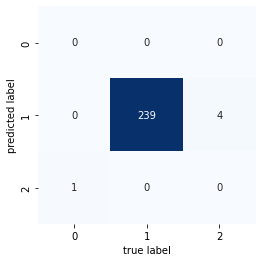

In [ ]:
sns.heatmap(confusion_lg.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=range(3), yticklabels=range(3))
plt.xlabel('true label')
plt.ylabel('predicted label');

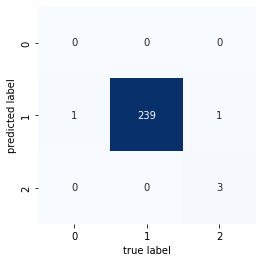

In [ ]:
sns.heatmap(confusion_svm.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=range(3), yticklabels=range(3))
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_encoder.fit(df_f2[['categoria_lluvia']])
df_cat_1hot = cat_encoder.transform(df_f2[['categoria_lluvia']])
df_cat_1hot

<1216x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1216 stored elements in Compressed Sparse Row format>

In [ ]:
pd.get_dummies(df_f2[['categoria_lluvia']])

,categoria_lluvia_no_lluvia,categoria_lluvia_poca_lluvia,categoria_lluvia_lluvia
fecha,,,
2020-01-01 18:00:00,1,0,0
2020-01-04 02:00:00,1,0,0
2020-01-05 06:00:00,1,0,0
2020-01-22 07:00:00,1,0,0
2020-01-22 12:00:00,1,0,0
...,...,...,...
2022-03-30 21:00:00,1,0,0
2022-03-30 22:00:00,1,0,0
2022-03-31 02:00:00,1,0,0
